In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/colab data file/oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
df.shape

(937, 50)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [7]:
nv = df.isnull().sum()
nv = nv[nv > 0]
nv.sort_values(ascending=False)

Series([], dtype: int64)

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
count,937.000000,937.000000,937.000000,937.000000,937.000000,9.370000e+02,937.000000,937.000000,937.000000,937.000000,...,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,81.588047,332.842049,698.707086,870.992209,84.121665,7.696964e+05,43.242721,9.127887,3940.712914,0.221003,...,933.928677,427.565582,255.435902,106.112519,5.014002,0.128068,7985.718004,61.694386,8.119723,0.043757
std,64.976730,1931.938570,599.965577,522.799325,45.361771,3.831151e+06,12.718404,3.588878,8167.427625,0.090316,...,1001.681331,715.391648,534.306194,135.617708,5.029151,0.334344,6854.504915,10.412807,2.908895,0.204662
min,1.000000,10.000000,1.920000,1.000000,0.000000,7.031200e+04,21.240000,0.830000,667.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2051.500000,35.950000,5.810000,0.000000
25%,31.000000,20.000000,85.270000,444.200000,54.000000,1.250000e+05,33.650000,6.750000,1371.000000,0.160000,...,450.000000,180.000000,90.800000,50.120000,2.370000,0.000000,3760.570000,65.720000,6.340000,0.000000
50%,64.000000,65.000000,704.370000,761.280000,73.000000,1.863000e+05,39.970000,8.200000,2090.000000,0.200000,...,685.420000,270.000000,161.650000,73.850000,3.850000,0.000000,5509.430000,65.930000,7.220000,0.000000
75%,124.000000,132.000000,1223.480000,1260.370000,117.000000,3.304680e+05,52.420000,10.760000,3435.000000,0.260000,...,1053.420000,460.980000,265.510000,125.810000,6.320000,0.000000,9521.930000,66.130000,7.840000,0.000000
max,352.000000,32389.000000,1893.080000,2724.570000,180.000000,7.131500e+07,82.640000,24.690000,160740.000000,0.740000,...,11949.330000,11500.000000,9593.480000,1748.130000,76.630000,1.000000,55128.460000,66.450000,15.440000,1.000000


## Selecting Categorical and numerical features

In [10]:
potential_categorical_features = []
threshold = 15

for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values <= threshold:
        potential_categorical_features.append(column)
        print(f'Feature "{column}" has {unique_values} unique values and might be categorical.')

if not potential_categorical_features:
    print("No potential categorical features found.")
else:
    print(f"Potential categorical features: {potential_categorical_features}")


Feature "f_22" has 9 unique values and might be categorical.
Feature "f_23" has 1 unique values and might be categorical.
Feature "f_25" has 9 unique values and might be categorical.
Feature "f_26" has 8 unique values and might be categorical.
Feature "f_27" has 9 unique values and might be categorical.
Feature "f_33" has 4 unique values and might be categorical.
Feature "f_37" has 3 unique values and might be categorical.
Feature "f_39" has 9 unique values and might be categorical.
Feature "f_40" has 9 unique values and might be categorical.
Feature "f_46" has 2 unique values and might be categorical.
Feature "target" has 2 unique values and might be categorical.
Potential categorical features: ['f_22', 'f_23', 'f_25', 'f_26', 'f_27', 'f_33', 'f_37', 'f_39', 'f_40', 'f_46', 'target']


In [11]:
cat_cols = ['f_22', 'f_23', 'f_25', 'f_26', 'f_27', 'f_33', 'f_37', 'f_39', 'f_40', 'f_46', 'target']

num_cols = [col for col in df.columns if col not in cat_cols]

In [12]:
df['f_40'].value_counts()

f_40
50    204
55    184
63    135
39    103
73     85
67     79
86     74
85     62
69     11
Name: count, dtype: int64

In [13]:
print(len(cat_cols))
print(len(num_cols))

11
39


## Feature Selection

**Feature selection is required here because we have 50 features which are unsuited for the model**

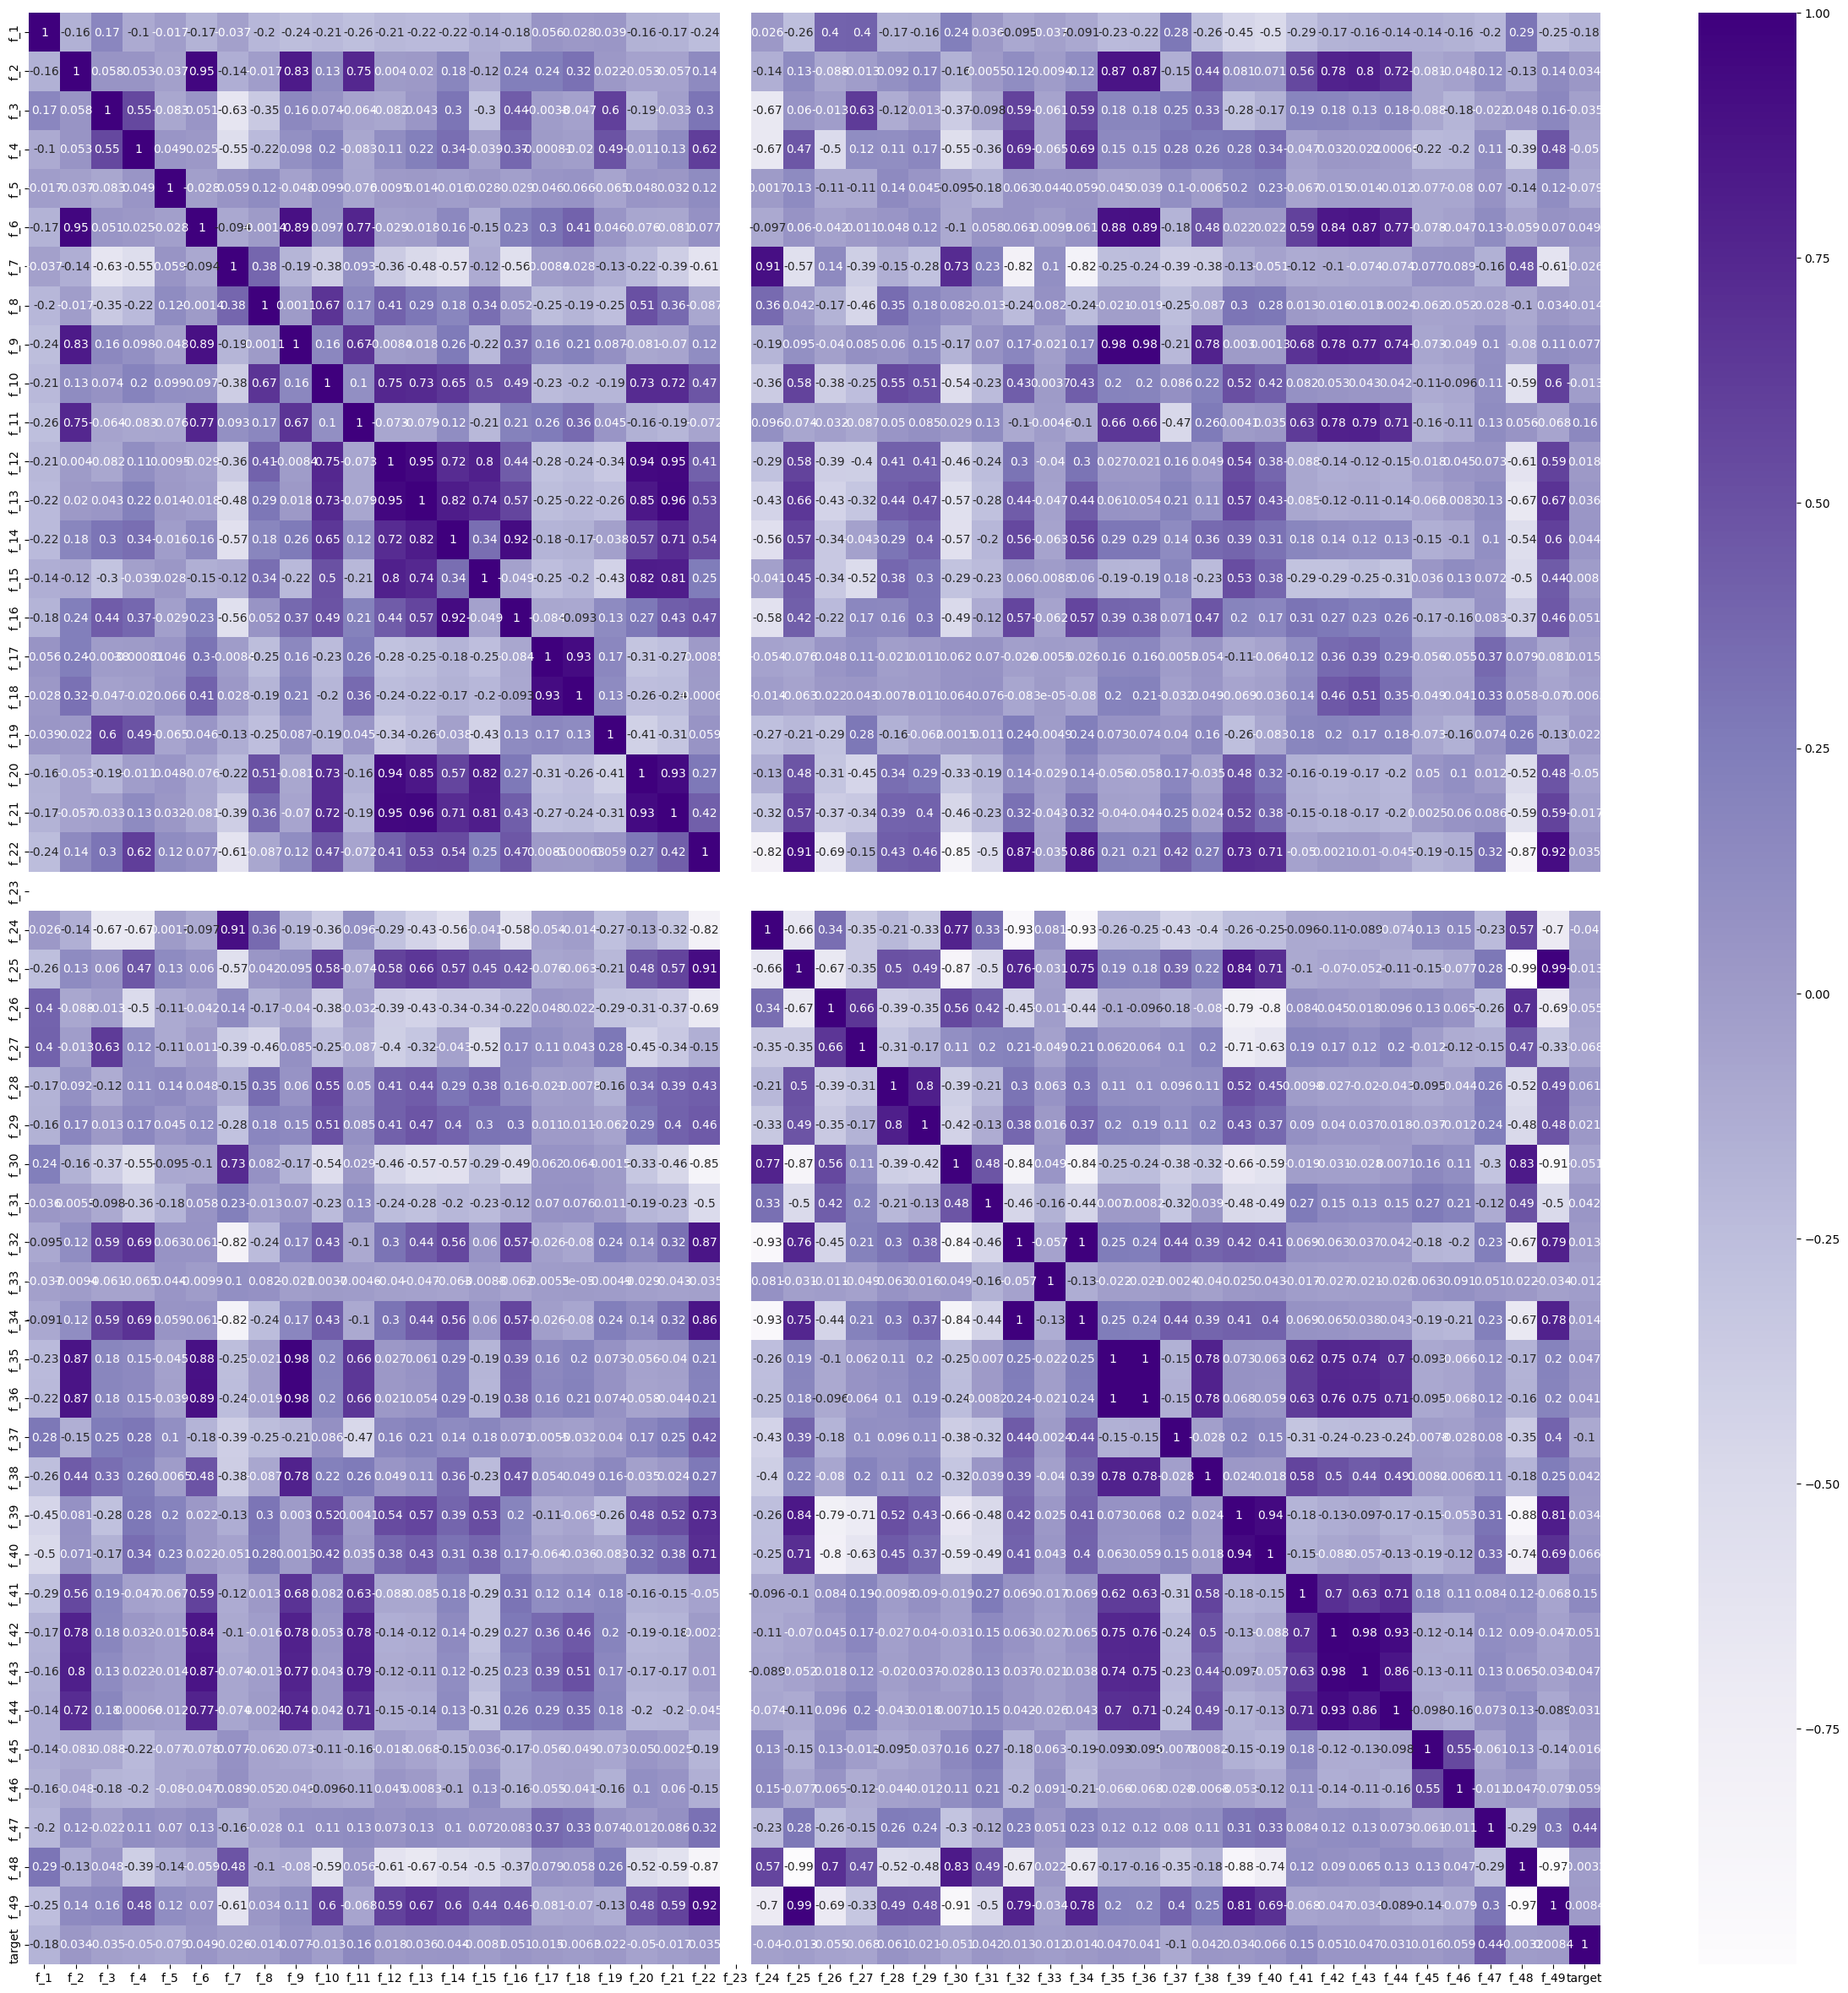

In [20]:
corr = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap= "Purples")
plt.show()

In [21]:
num_cols

['f_1',
 'f_2',
 'f_3',
 'f_4',
 'f_5',
 'f_6',
 'f_7',
 'f_8',
 'f_9',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_24',
 'f_28',
 'f_29',
 'f_30',
 'f_31',
 'f_32',
 'f_34',
 'f_35',
 'f_36',
 'f_38',
 'f_41',
 'f_42',
 'f_43',
 'f_44',
 'f_45',
 'f_47',
 'f_48',
 'f_49']

In [23]:
def correlation (dataset, threshold):
  corr_col = set()
  corr_matrix = dataset.corr()

  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        corr_col.add(colname)
  return corr_col

In [24]:
High_corr_feat = correlation(df, 0.7)
print(len(High_corr_feat))

27


In [25]:
High_corr_feat

{'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_18',
 'f_20',
 'f_21',
 'f_24',
 'f_25',
 'f_29',
 'f_30',
 'f_32',
 'f_34',
 'f_35',
 'f_36',
 'f_38',
 'f_39',
 'f_40',
 'f_42',
 'f_43',
 'f_44',
 'f_48',
 'f_49',
 'f_6',
 'f_9'}

#### Using Feature importance method of Random Forest bor better decision

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
# Separate features and target
x = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

# Get feature importances
imp_feat = forest.feature_importances_
mean_importance = np.mean(imp_feat)
std_importance = np.std(imp_feat)

In [28]:
imp_feat

array([0.07332398, 0.01971647, 0.01506928, 0.04111053, 0.02176426,
       0.02163577, 0.02354695, 0.02084428, 0.01561991, 0.01614662,
       0.02156506, 0.01681376, 0.01984909, 0.01987316, 0.01594908,
       0.01767929, 0.02207773, 0.02288631, 0.01971611, 0.01317309,
       0.01514564, 0.00726373, 0.        , 0.01862542, 0.03859374,
       0.00502522, 0.00662783, 0.00911714, 0.01874776, 0.02655529,
       0.01861299, 0.01064635, 0.        , 0.0115403 , 0.01850997,
       0.02136448, 0.00108966, 0.01977912, 0.00359217, 0.00291329,
       0.03201321, 0.02162046, 0.02029819, 0.00998448, 0.0220041 ,
       0.00549814, 0.13096244, 0.02549836, 0.0200098 ])

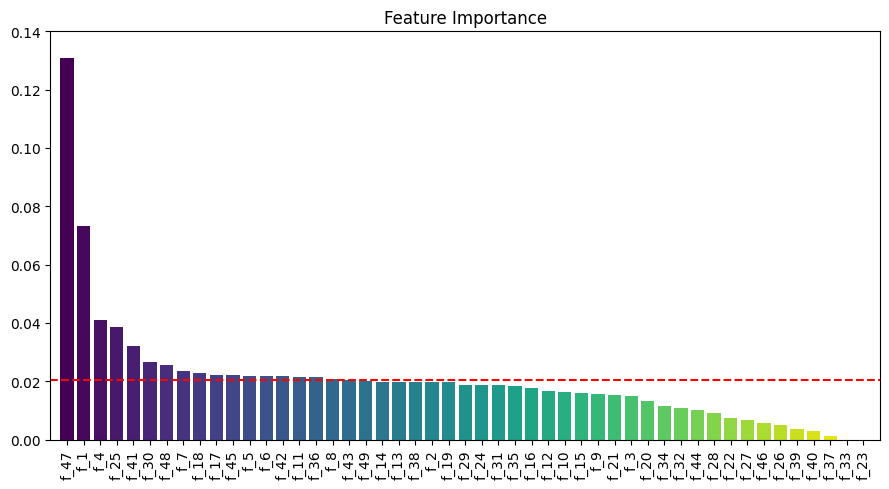

In [45]:
imp_feat = forest.feature_importances_
indices = np.argsort(imp_feat)[::-1]
mean_importance = np.mean(imp_feat)
std_importance = np.std(imp_feat)

# Plot the feature importance of the forest

plt.figure(figsize=(9, 5))
plt.title("Feature Importance")

colormap = plt.cm.viridis
normalize = plt.Normalize(vmin=0, vmax=x_train.shape[1]-1)
colors = colormap(normalize(range(x_train.shape[1])))
plt.bar(range(x_train.shape[1]), imp_feat[indices], color = colors)

# Add mean feature importance line
plt.axhline(y=mean_importance, color='r', linestyle='--', label=f'Mean Importance: {mean_importance:.4f}')

plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.ylim([0, 0.14])
plt.tight_layout()
plt.show()

In [30]:
features_below_mean = [x_train.columns[i] for i in range(len(imp_feat)) if imp_feat[i] < mean_importance]
print(len(features_below_mean))
print(features_below_mean)

32
['f_2', 'f_3', 'f_9', 'f_10', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_26', 'f_27', 'f_28', 'f_29', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_37', 'f_38', 'f_39', 'f_40', 'f_43', 'f_44', 'f_46', 'f_49']


In [31]:
features_below_mean = [x_train.columns[i] for i in range(len(imp_feat)) if imp_feat[i] < mean_importance]
features_below_mean

['f_2',
 'f_3',
 'f_9',
 'f_10',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_26',
 'f_27',
 'f_28',
 'f_29',
 'f_31',
 'f_32',
 'f_33',
 'f_34',
 'f_35',
 'f_37',
 'f_38',
 'f_39',
 'f_40',
 'f_43',
 'f_44',
 'f_46',
 'f_49']

In [32]:
High_corr_feat

{'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_18',
 'f_20',
 'f_21',
 'f_24',
 'f_25',
 'f_29',
 'f_30',
 'f_32',
 'f_34',
 'f_35',
 'f_36',
 'f_38',
 'f_39',
 'f_40',
 'f_42',
 'f_43',
 'f_44',
 'f_48',
 'f_49',
 'f_6',
 'f_9'}

In [46]:
# Now seleceting the common features from the High corr features and features below mean

unwanted_features = set(features_below_mean)
High_corr_feat = set(High_corr_feat)


drop_feat = unwanted_features & High_corr_feat # common elements selected
drop_feat

{'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_20',
 'f_21',
 'f_24',
 'f_29',
 'f_32',
 'f_34',
 'f_35',
 'f_38',
 'f_39',
 'f_40',
 'f_43',
 'f_44',
 'f_49',
 'f_9'}

In [47]:
orig_drp ={'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_20',
 'f_21',
 'f_24',
 'f_29',
 'f_32',
 'f_34',
 'f_35',
 'f_38',
 'f_40',
 'f_43',
 'f_44',
 'f_49',
 'f_9'}

In [48]:
print(len(orig_drp))

18


In [49]:
print(len(drop_feat))

19


In [50]:
diff = drop_feat - orig_drp
print(diff)

{'f_39'}


In [51]:
# From the inference 'f_23' will also be dropped here

## Treating Categorical columns

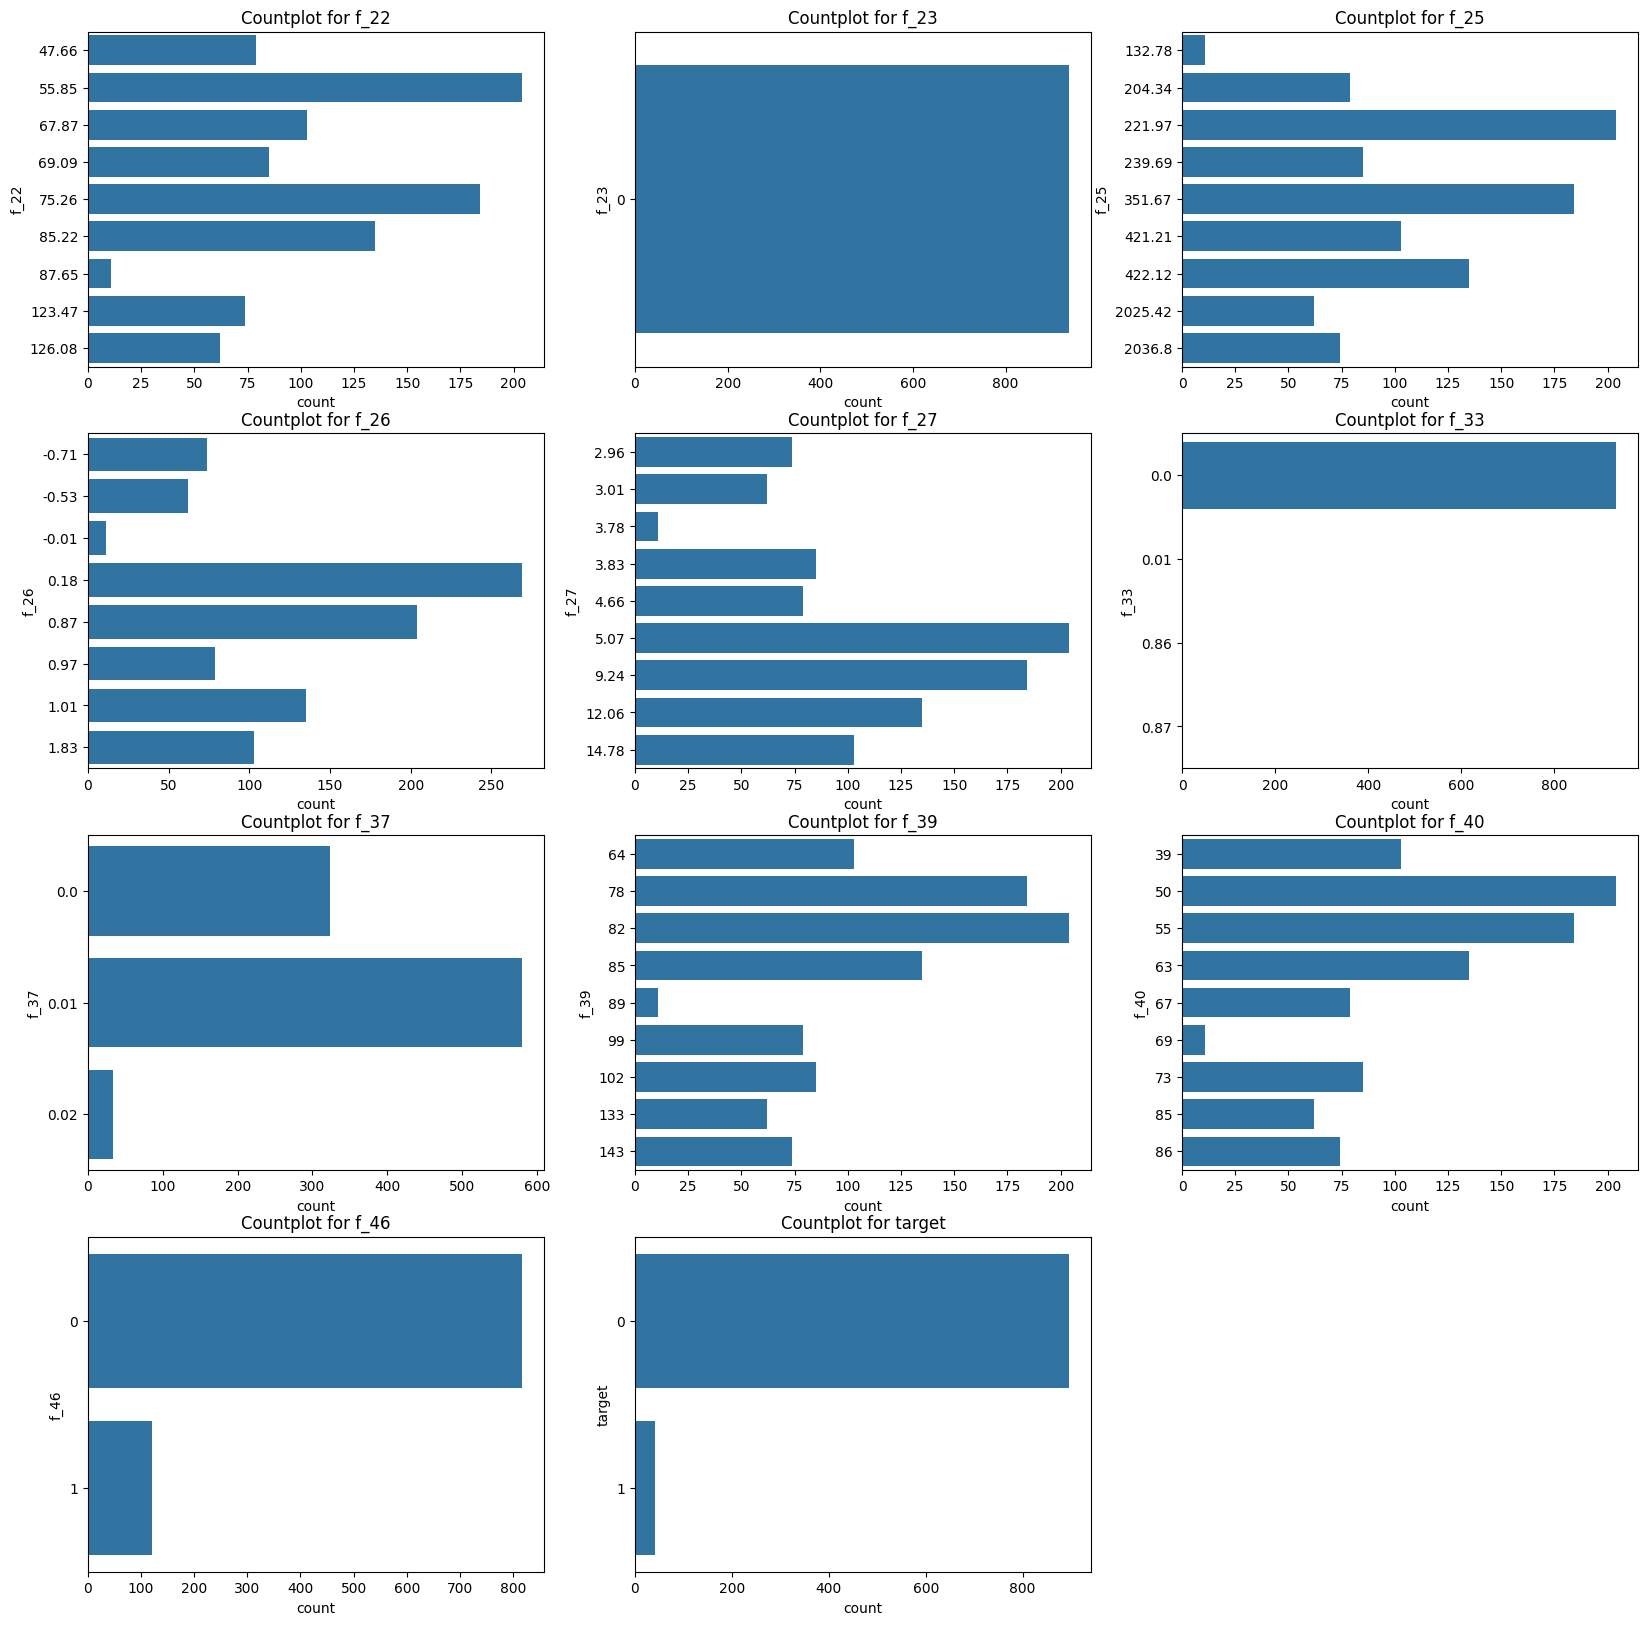

In [52]:
plt.figure(figsize=(20,20))
for i in range(len(cat_cols)):
    plt.subplot(4,3,i+1)
    sns.countplot(y=df[cat_cols[i]])
    plt.title(f'Countplot for {cat_cols[i]}')

plt.show()

In [ ]:
## Inference f_23 should be dropped

In [ ]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [ ]:
cat_cols.remove('f_23')
df1.drop('f_23', axis=1, inplace=True)
df1.drop(drop_feat, axis=1, inplace=True)

In [ ]:
df1.shape

(937, 30)

In [ ]:
# Again selecting numcols and cat cols

In [ ]:
potential_categorical_features = []
threshold = 15

for column in df1.columns:
    unique_values = df1[column].nunique()
    if unique_values <= threshold:
        potential_categorical_features.append(column)
        print(f'Feature "{column}" has {unique_values} unique values and might be categorical.')

if not potential_categorical_features:
    print("No potential categorical features found.")
else:
    print(f"Potential categorical features: {potential_categorical_features}")


Feature "f_22" has 9 unique values and might be categorical.
Feature "f_25" has 9 unique values and might be categorical.
Feature "f_26" has 8 unique values and might be categorical.
Feature "f_27" has 9 unique values and might be categorical.
Feature "f_33" has 4 unique values and might be categorical.
Feature "f_37" has 3 unique values and might be categorical.
Feature "f_46" has 2 unique values and might be categorical.
Feature "target" has 2 unique values and might be categorical.
Potential categorical features: ['f_22', 'f_25', 'f_26', 'f_27', 'f_33', 'f_37', 'f_46', 'target']


In [ ]:
cat_cols = ['f_22', 'f_25', 'f_26', 'f_27', 'f_33', 'f_37', 'f_46', 'target']

num_cols = [col for col in df1.columns if col not in cat_cols]
print(len(cat_cols))
print(len(num_cols))

8
22


In [ ]:
print(len(num_cols))
print(num_cols)

22
['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_10', 'f_11', 'f_17', 'f_18', 'f_19', 'f_28', 'f_30', 'f_31', 'f_36', 'f_41', 'f_42', 'f_45', 'f_47', 'f_48']


## Treating Numerical Colums

In [ ]:
print(len(cat_cols))

8


In [ ]:
num_cols

['f_1',
 'f_2',
 'f_3',
 'f_4',
 'f_5',
 'f_6',
 'f_7',
 'f_8',
 'f_10',
 'f_11',
 'f_17',
 'f_18',
 'f_19',
 'f_28',
 'f_30',
 'f_31',
 'f_36',
 'f_41',
 'f_42',
 'f_45',
 'f_47',
 'f_48']

In [ ]:
print(len(num_cols))

22


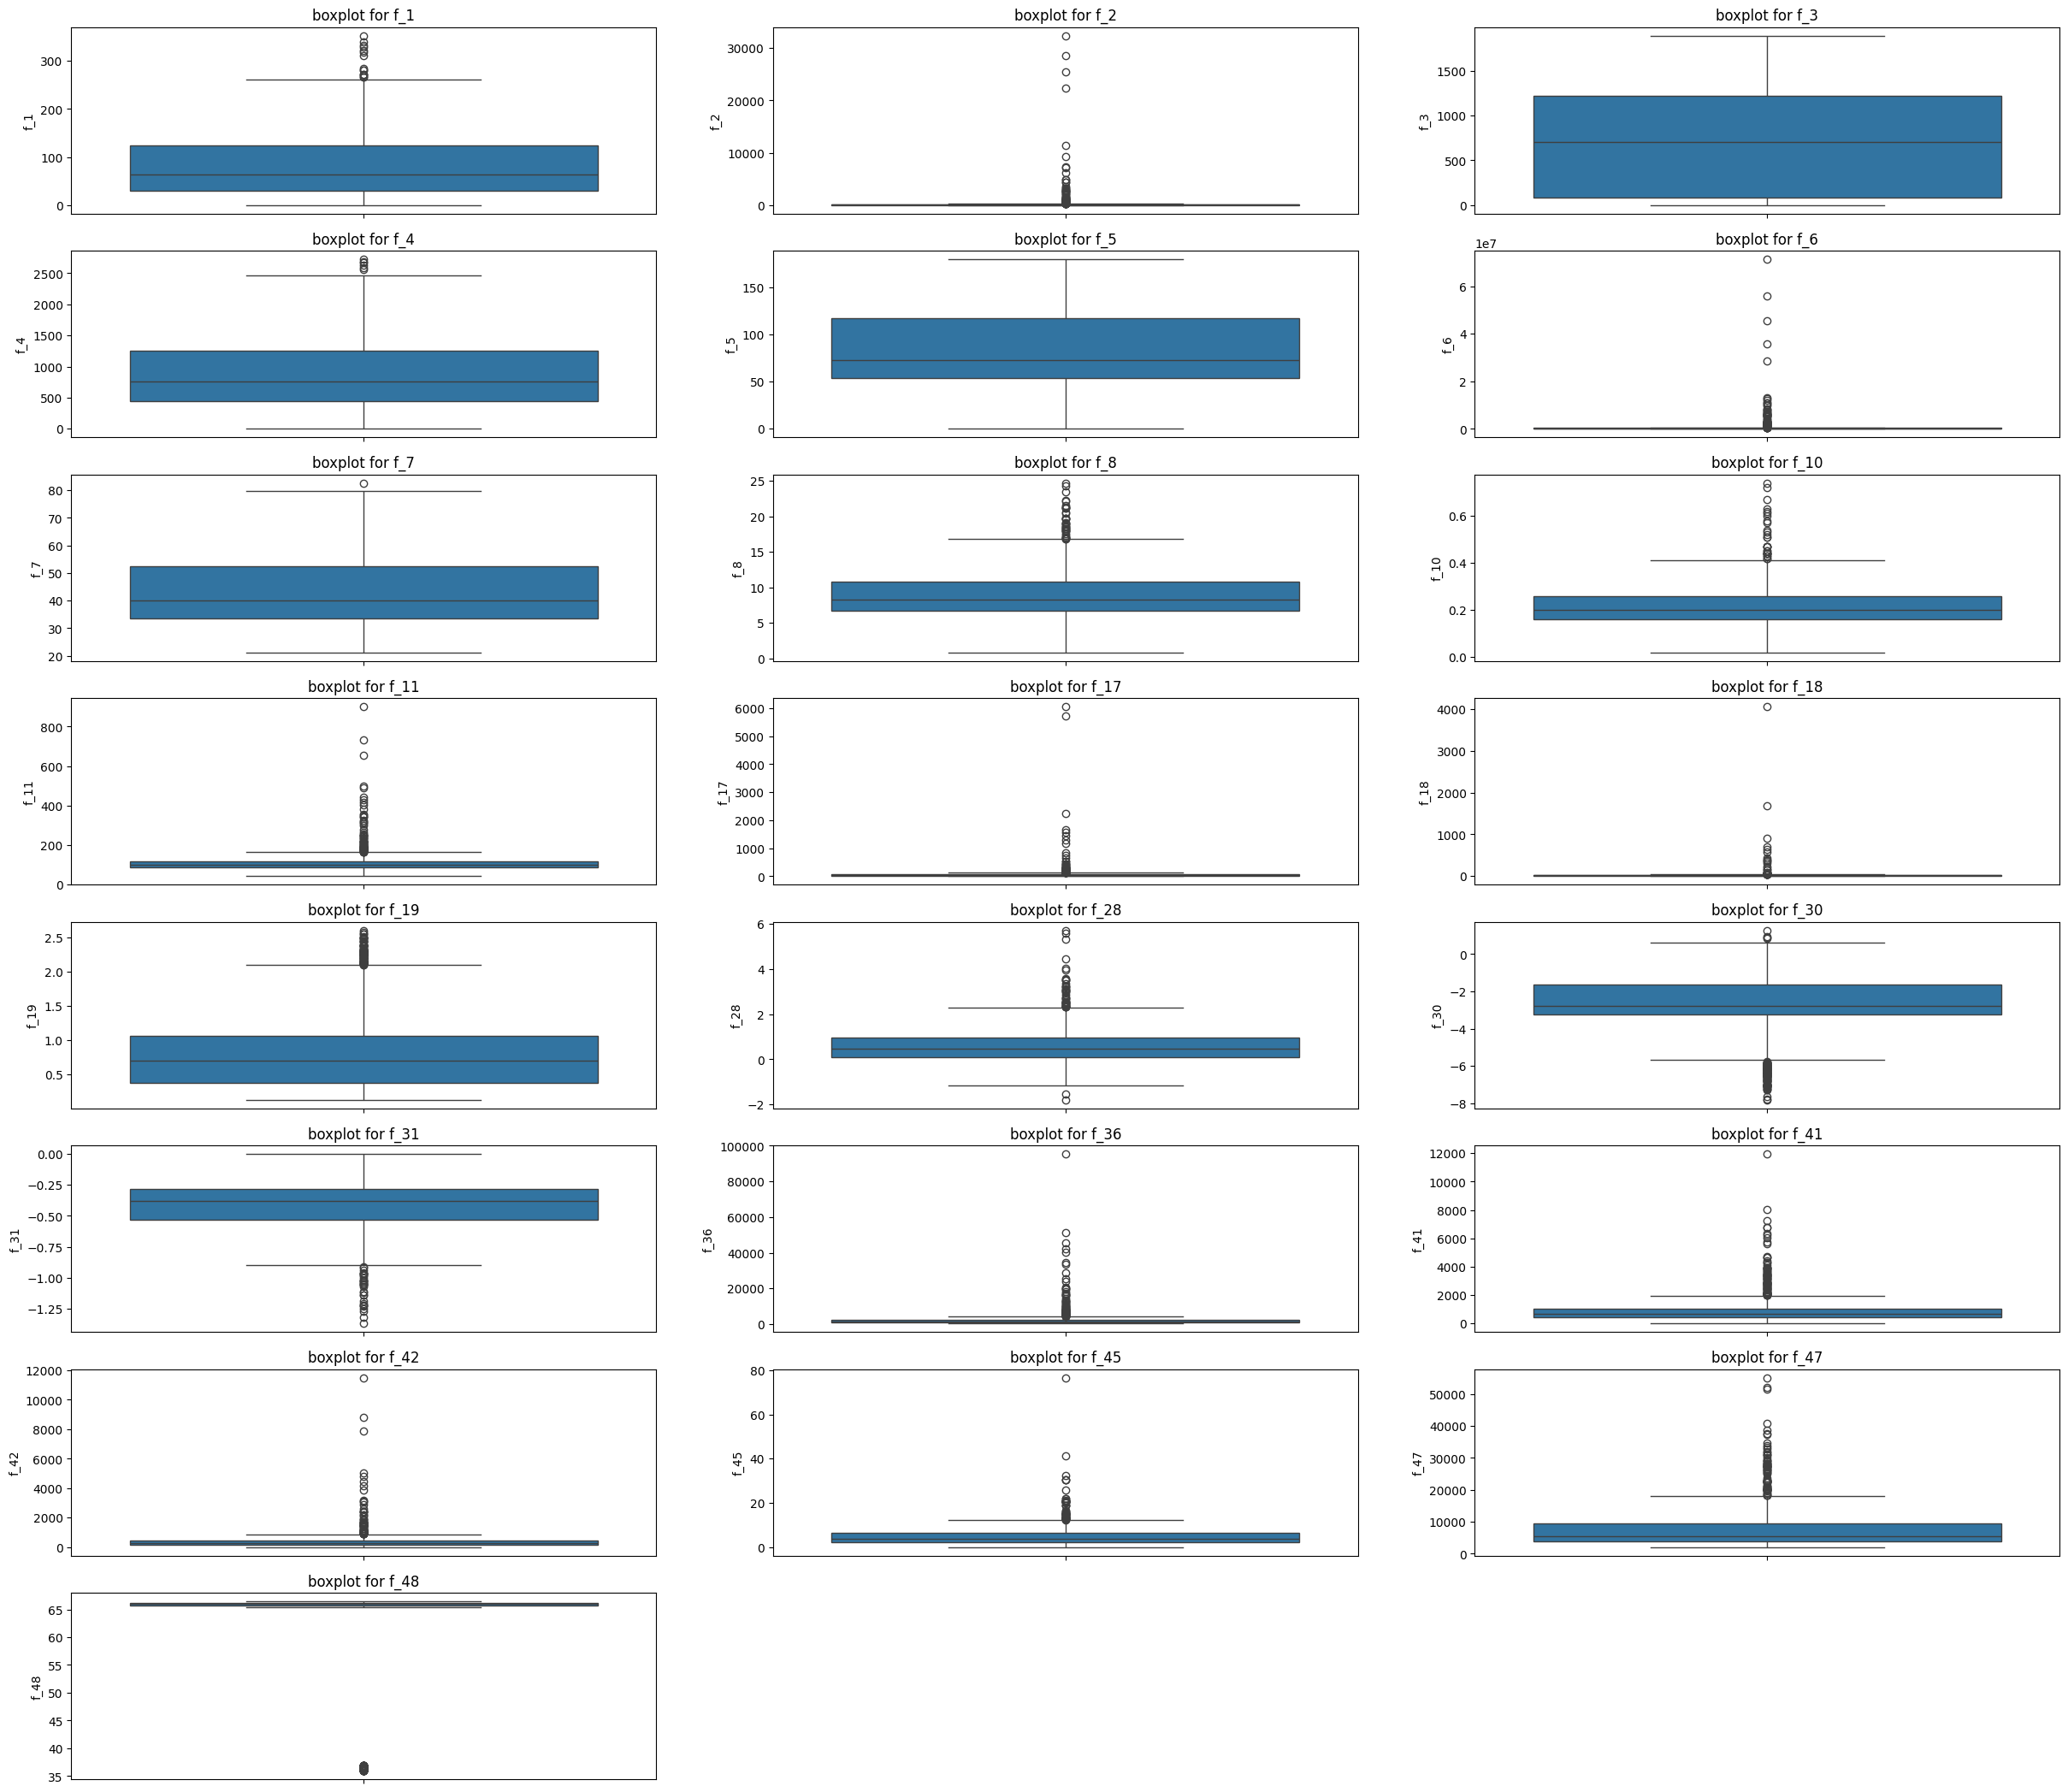

In [ ]:
plt.figure(figsize=(30,30))
for i in range(len(num_cols)):
    plt.subplot(9, 3, i+1)
    sns.boxplot(y=df1[num_cols[i]])
    plt.title(f'boxplot for {num_cols[i]}')

plt.show()

### Outlier Treatment

In [ ]:
num_cols

['f_1',
 'f_2',
 'f_3',
 'f_4',
 'f_5',
 'f_6',
 'f_7',
 'f_8',
 'f_10',
 'f_11',
 'f_17',
 'f_18',
 'f_19',
 'f_28',
 'f_30',
 'f_31',
 'f_36',
 'f_41',
 'f_42',
 'f_45',
 'f_47',
 'f_48']

In [ ]:
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1[col] = df1[col].clip(lower=lower_bound, upper=upper_bound)

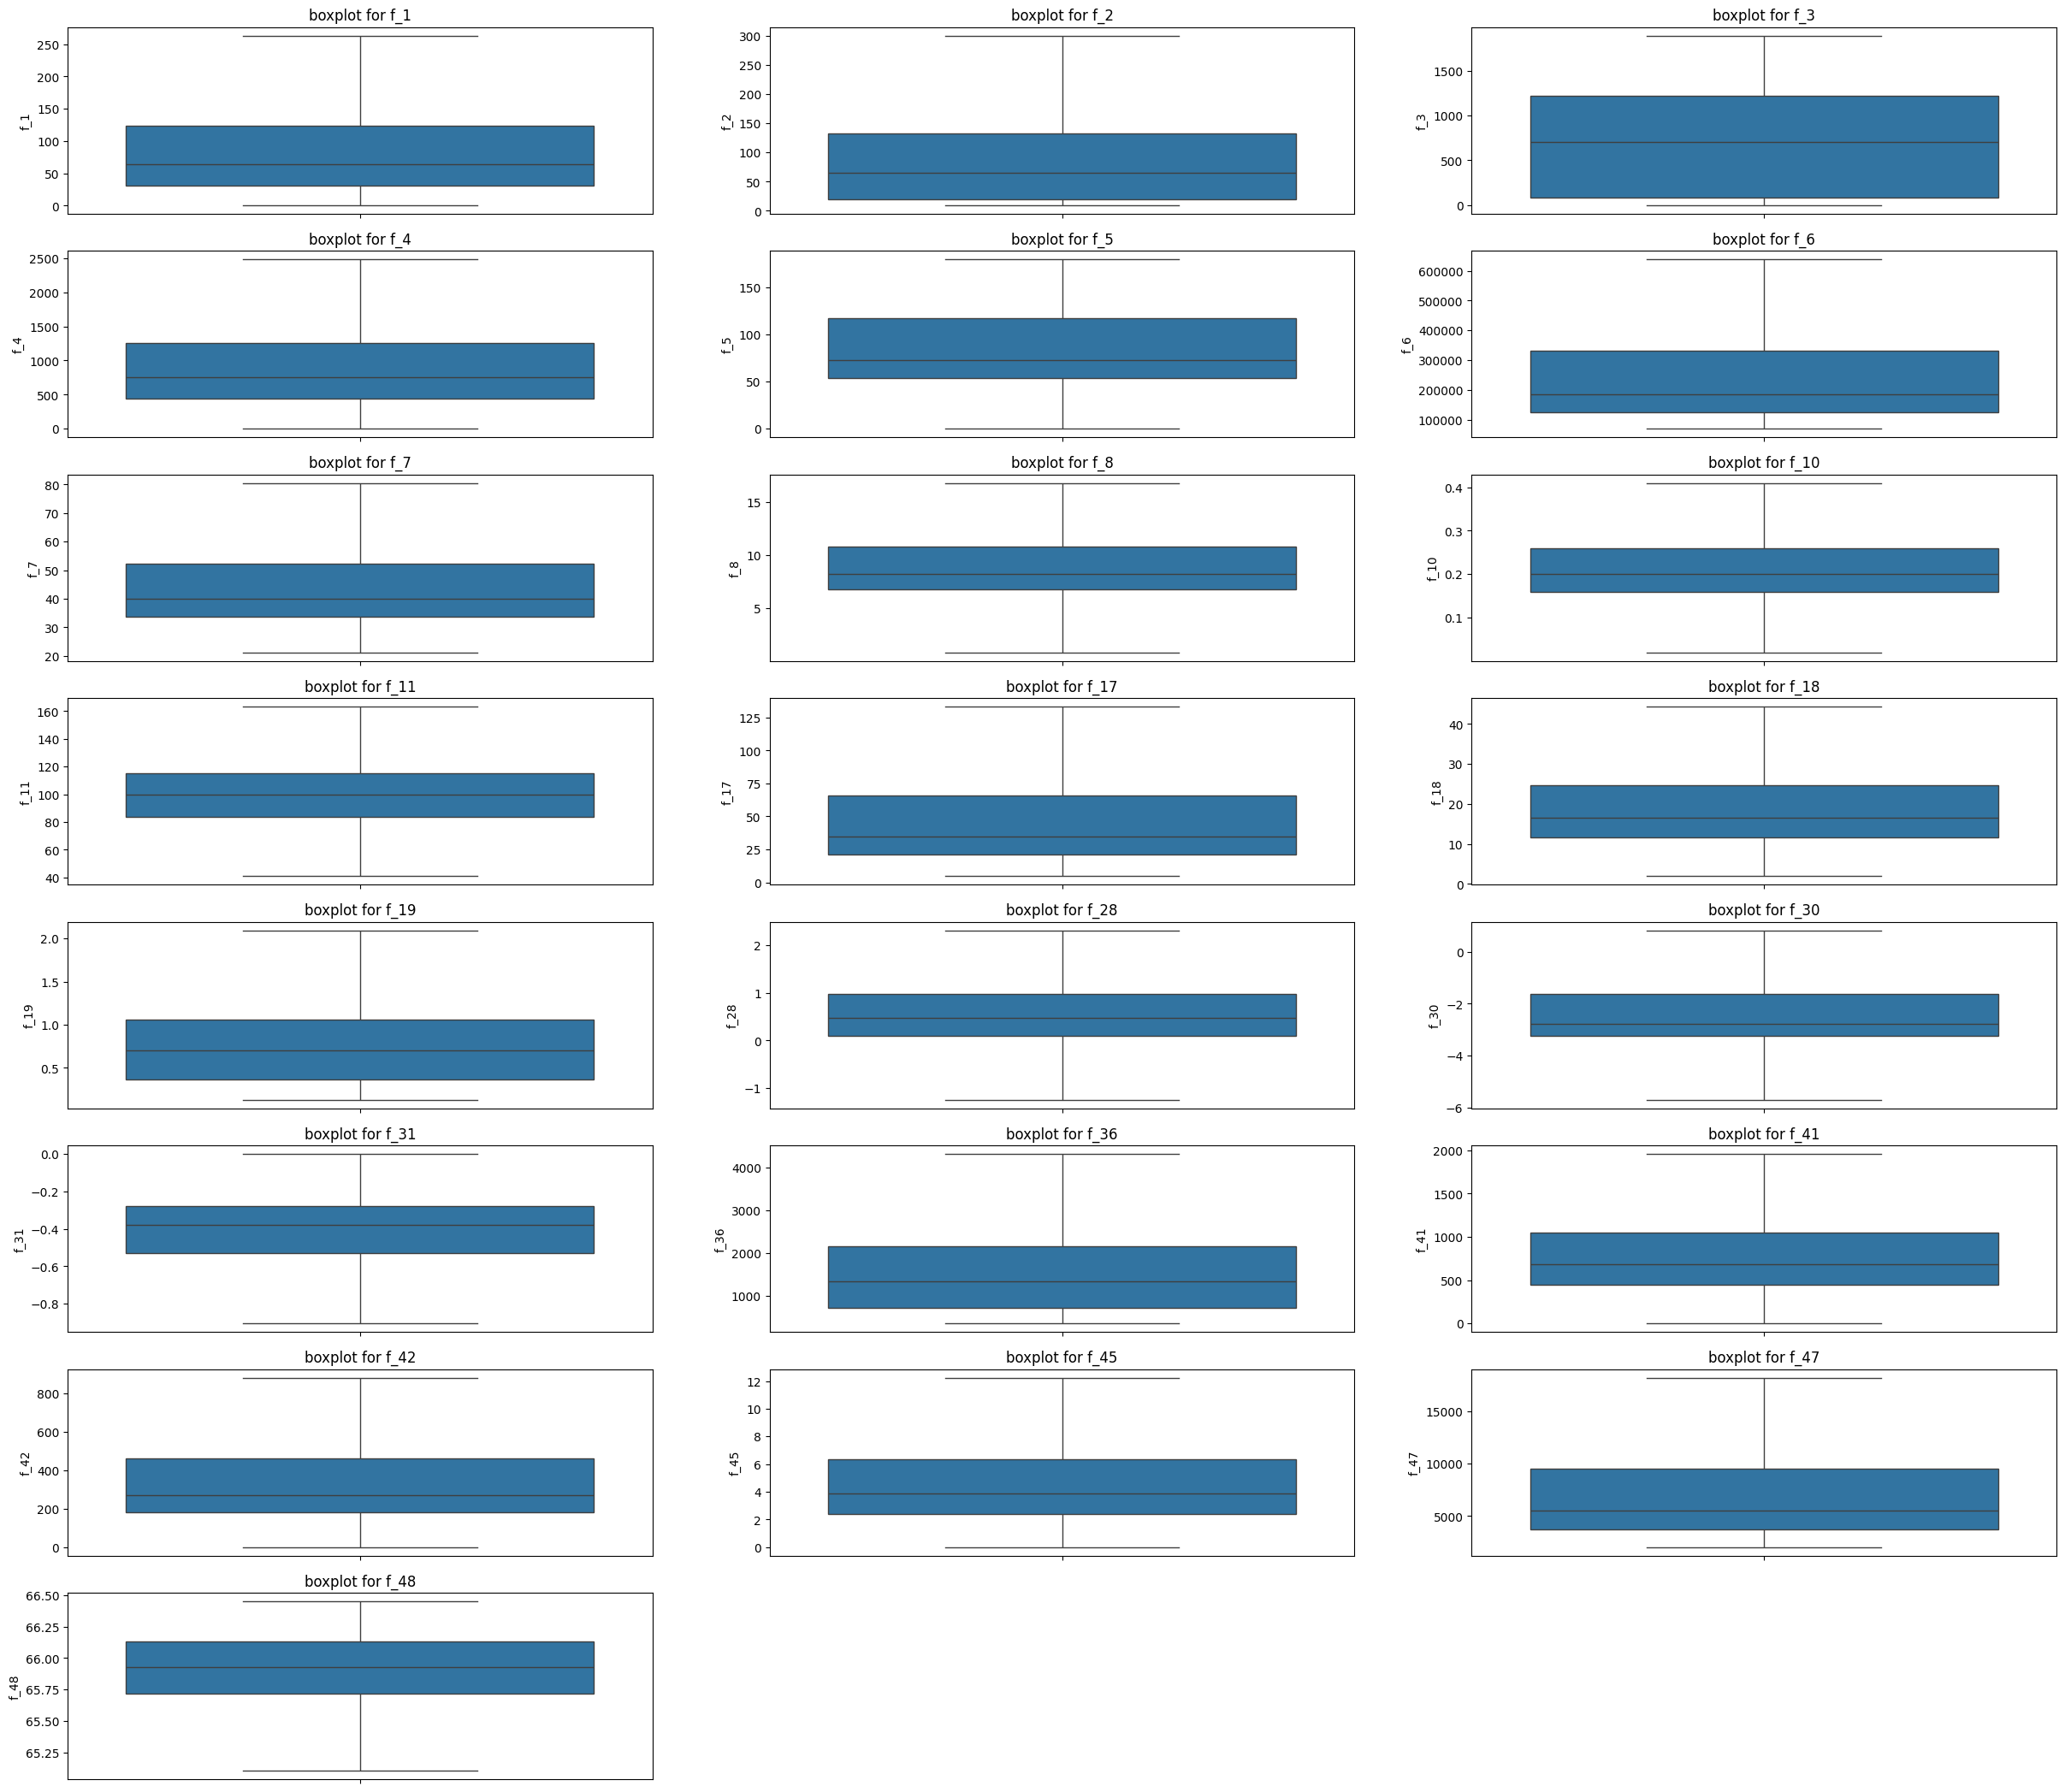

In [ ]:
plt.figure(figsize=(30,30))
for i in range(len(num_cols)):
    plt.subplot(9, 3, i+1)
    sns.boxplot(y=df1[num_cols[i]])
    plt.title(f'boxplot for {num_cols[i]}')

plt.show()

In [ ]:
df1.shape

(937, 30)

## Splilt into x and y

In [ ]:
x = df1.drop('target', axis=1)
y = df1['target']

In [ ]:
y.value_counts()

target
0    896
1     41
Name: count, dtype: int64

## Data Balancing

Data is Highly Imbalanced here so we need to balance it

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

print(x.shape)
print(y.shape)

(937, 29)
(937,)


In [ ]:
x_res, y_res = smote.fit_resample(x, y)

In [ ]:
print(x_res.shape)
print(y_res.shape)

(1792, 29)
(1792,)


In [ ]:
y_res.value_counts()

target
1    896
0    896
Name: count, dtype: int64

## Split Data into train and test and standardize

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1254, 29)
(538, 29)
(1254,)
(538,)


In [ ]:
# Now Standardize the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test = scaler.transform(x_test)

#### Creating evaluaiton metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
def eval_model(model, mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)

    accuracy = accuracy_score(y_test, ypred)
    precision = precision_score(y_test, ypred, average='binary')
    recall = recall_score(y_test, ypred, average='binary')
    class_report = classification_report(y_test, ypred)
    cm = confusion_matrix(y_test, ypred)


    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_acc':test_acc, 'Accuracy': accuracy},
                         index=[mname])

    # print('accuracy', accuracy)
    # print('precision', precision)
    # print('recall', recall)
    print('classification_report', class_report)

    return res_df

### KNN m1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_m1 = KNeighborsClassifier()
knn_m1.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
df_knn = eval_model(knn_m1,'KNN')
df_knn

classification_report               precision    recall  f1-score   support

           0       0.99      0.94      0.96       269
           1       0.94      0.99      0.96       269

    accuracy                           0.96       538
   macro avg       0.96      0.96      0.96       538
weighted avg       0.96      0.96      0.96       538



,Train_Acc,Test_acc,Accuracy
KNN,0.980861,0.962825,0.962825


### Logistic Regression m1

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

log_m1 = LogisticRegressionCV()
log_m1.fit(x_train, y_train)

LogisticRegressionCV()

In [ ]:
df_lg = eval_model(log_m1,'Logistic Regression')
df_lg

classification_report               precision    recall  f1-score   support

           0       0.97      0.94      0.95       269
           1       0.94      0.97      0.96       269

    accuracy                           0.96       538
   macro avg       0.96      0.96      0.96       538
weighted avg       0.96      0.96      0.96       538



,Train_Acc,Test_acc,Accuracy
Logistic Regression,0.951356,0.95539,0.95539


### Decision Tree m1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_m1 = DecisionTreeClassifier()
dt_m1.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
df_dt = eval_model(dt_m1,'Decision Tree') # Overfitting
df_dt

classification_report               precision    recall  f1-score   support

           0       0.96      0.96      0.96       269
           1       0.96      0.96      0.96       269

    accuracy                           0.96       538
   macro avg       0.96      0.96      0.96       538
weighted avg       0.96      0.96      0.96       538



,Train_Acc,Test_acc,Accuracy
Decision Tree,1.0,0.957249,0.957249


### Random Forest m1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_m1 = RandomForestClassifier()
rf_m1.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
df_rf = eval_model(rf_m1,'Random Forest') # good results
df_rf

classification_report               precision    recall  f1-score   support

           0       0.99      0.98      0.99       269
           1       0.98      0.99      0.99       269

    accuracy                           0.99       538
   macro avg       0.99      0.99      0.99       538
weighted avg       0.99      0.99      0.99       538



,Train_Acc,Test_acc,Accuracy
Random Forest,1.0,0.986989,0.986989


### Bagging Classifier m1

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_dt_m1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_dt_m1.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
df_bag_dt = eval_model(bag_dt_m1,'Bagging Decision Tree')
df_bag_dt

classification_report               precision    recall  f1-score   support

           0       0.98      0.97      0.98       269
           1       0.97      0.99      0.98       269

    accuracy                           0.98       538
   macro avg       0.98      0.98      0.98       538
weighted avg       0.98      0.98      0.98       538



,Train_Acc,Test_acc,Accuracy
Bagging Decision Tree,1.0,0.975836,0.975836


In [ ]:
bag_knn_m1 = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100, random_state=42)
bag_knn_m1.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
df_bag_knn = eval_model(bag_knn_m1,'Bagging KNN')
df_bag_knn

classification_report               precision    recall  f1-score   support

           0       1.00      0.94      0.97       269
           1       0.94      1.00      0.97       269

    accuracy                           0.97       538
   macro avg       0.97      0.97      0.97       538
weighted avg       0.97      0.97      0.97       538



,Train_Acc,Test_acc,Accuracy
Bagging KNN,0.981659,0.966543,0.966543


In [ ]:
bag_rf_m1 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bag_rf_m1.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
df_bag_rf = eval_model(bag_rf_m1,'Bagging Random Forest') # overall good score
df_bag_rf

classification_report               precision    recall  f1-score   support

           0       0.99      0.98      0.98       269
           1       0.98      0.99      0.98       269

    accuracy                           0.98       538
   macro avg       0.98      0.98      0.98       538
weighted avg       0.98      0.98      0.98       538



,Train_Acc,Test_acc,Accuracy
Bagging Random Forest,0.999203,0.983271,0.983271


In [ ]:
bag_log_m1 = BaggingClassifier(base_estimator=LogisticRegressionCV(), n_estimators=100, random_state=42)
bag_log_m1.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegressionCV(), n_estimators=100,
                  random_state=42)

In [ ]:
df_bag_lg = eval_model(bag_log_m1,'Bagging Logistic Regression')
df_bag_lg

classification_report               precision    recall  f1-score   support

           0       0.97      0.93      0.95       269
           1       0.94      0.97      0.95       269

    accuracy                           0.95       538
   macro avg       0.95      0.95      0.95       538
weighted avg       0.95      0.95      0.95       538



,Train_Acc,Test_acc,Accuracy
Bagging Logistic Regression,0.950558,0.951673,0.951673


In [ ]:
result_df = pd.concat([df_knn, df_lg, df_dt, df_rf, df_bag_dt, df_bag_knn, df_bag_rf, df_bag_lg], axis=0).sort_values(by='Accuracy', ascending=False)
result_df

,Train_Acc,Test_acc,Accuracy
Random Forest,1.000000,0.986989,0.986989
Bagging Random Forest,0.999203,0.983271,0.983271
Bagging Decision Tree,1.000000,0.975836,0.975836
Bagging KNN,0.981659,0.966543,0.966543
KNN,0.980861,0.962825,0.962825
Decision Tree,1.000000,0.957249,0.957249
Logistic Regression,0.951356,0.955390,0.955390
Bagging Logistic Regression,0.950558,0.951673,0.951673


So, As far as we see **Bagging Random Forest** has the higher results. we can apply hyperparameter tuning to it.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# param_grid = {
#     'base_estimator__criterion': ['gini', 'entropy'],
#     'base_estimator__n_estimators': [50, 100, 200],
#     'base_estimator__max_features': ['auto', 'sqrt', 'log2'],
#     'base_estimator__max_depth': [None, 10, 20, 30],
#     'n_estimators': [10, 50, 100]
# }

# bag_rf = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

In [ ]:
# rnd_ht = RandomizedSearchCV(bag_rf, param_grid, cv=5, scoring='accuracy')
# rnd_ht.fit(x_train, y_train)

In [ ]:
# dir(rnd_ht)

In [ ]:
# rnd_ht.best_params_

In [ ]:
# rnd_ht.best_score_

## Model After Hyperparameter Tuning

In [ ]:
bag_rf_m1 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bag_rf_m1.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
RF = RandomForestClassifier(n_estimators=200, criterion='gini', max_features='log2', max_depth=20)


Bag_RF = BaggingClassifier(base_estimator=RF, n_estimators=50, random_state=42)
Bag_RF.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=20,
                                                        max_features='log2',
                                                        n_estimators=200),
                  n_estimators=50, random_state=42)

In [ ]:
df_Bag_RF = eval_model(Bag_RF,'Bagging Random Forest') # Select this model
df_Bag_RF

classification_report               precision    recall  f1-score   support

           0       0.99      0.98      0.98       269
           1       0.98      0.99      0.98       269

    accuracy                           0.98       538
   macro avg       0.98      0.98      0.98       538
weighted avg       0.98      0.98      0.98       538



,Train_Acc,Test_acc,Accuracy
Bagging Random Forest,0.999203,0.983271,0.983271


In [ ]:
Bag_RF.predict(x_test)

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

## Making new dataset with 20 samples

In [ ]:
new_data = df1.sample(20)
new_data.shape

(20, 30)

In [ ]:
new_data

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_10,f_11,...,f_33,f_36,f_37,f_41,f_42,f_45,f_46,f_47,f_48,target
447,15.0,210,1111.80,1889.67,137,295312,31.80,8.43,0.27,88.40,...,0.0,2340,0.01,0.00,0.00,0.000,0,14192.31,65.105,0
354,71.0,300,1166.82,1832.68,166,638670,40.51,11.27,0.28,116.30,...,0.0,4320,0.01,1958.55,882.45,3.130,0,10219.05,66.340,0
195,1.0,300,805.86,358.51,60,638670,24.65,6.74,0.27,163.25,...,0.0,4320,0.00,1958.55,882.45,2.850,0,15749.24,65.610,1
143,133.0,50,1687.60,1498.74,9,125000,37.34,7.30,0.20,63.10,...,0.0,1620,0.01,509.90,304.14,2.460,0,3423.55,66.300,0
932,200.0,12,92.42,364.42,135,97200,59.42,10.34,0.17,110.00,...,0.0,540,0.01,381.84,254.56,4.500,0,2593.50,65.850,0
803,71.0,15,11.93,11.13,75,121500,44.40,10.02,0.23,105.30,...,0.0,450,0.00,569.21,180.00,5.420,0,13587.90,65.350,0
296,263.5,75,1117.59,842.47,55,187500,31.95,6.73,0.21,91.90,...,0.0,1260,0.01,860.23,223.61,5.200,0,4866.52,65.870,0
601,33.0,12,122.83,578.33,76,97200,50.33,15.02,0.30,91.40,...,0.0,540,0.01,569.21,90.00,9.490,1,4513.34,66.140,0
781,49.0,27,11.74,554.74,68,218700,51.04,9.96,0.20,103.60,...,0.0,810,0.00,603.74,402.49,2.960,0,3772.43,66.070,0
635,67.0,12,356.25,614.92,95,97200,50.58,15.51,0.31,110.00,...,0.0,450,0.00,360.00,180.00,2.670,0,17382.04,66.280,0


### Apply Preprocessing Steps

In [ ]:
new_data['target'].value_counts()

target
0    18
1     2
Name: count, dtype: int64

In [ ]:
array1 = new_data['target'].to_numpy()
array1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_data = scaler.transform(new_data.drop('target', axis=1))

In [ ]:
predictions = Bag_RF.predict(test_data)

new_data['predictions'] = predictions

In [ ]:
new_data['predictions'].value_counts()

predictions
0    18
1     2
Name: count, dtype: int64

In [ ]:
array2 = new_data['predictions'].to_numpy()
array2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
array1 == array2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
# Calculate the number of correct predictions
correct_predictions = np.sum(array1 == array2)

# Calculate the accuracy percentage
accuracy_percentage = (correct_predictions / len(array1)) * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 100.00%
